# icrawler 패키지를 사용한 이미지 다운로드

참고 
* https://icrawler.readthedocs.io/
* http://pypi.org/project/

In [5]:
# Google Colab에서 할당받은 가상 머신에는 icrawler 패키지가 설치되어 있지 않음
# icrawelr 패키지의 기능들을 사용하려면, 먼저 설치를 진행해야 함
# Jupyter Notebook의 코드 셀에서 외부 명령(콘솔에서 실행시키는 명령)을 실행할 때는 !로 시작
!pip install icrawler

In [11]:
import os # 디렉토리(폴더) 생성, 삭제 등의 관리
from icrawler.builtin import BingImageCrawler, BaiduImageCrawler, GoogleImageCrawler
# icrawler 패키지의 builin 모듈에서 클래스들을 임포트

In [13]:
# Google Drive mount
default_dir = '/content/drive/MyDrive'
download_dir = os.path.join(default_dir, 'downloads') #/content/drive/MyDrive/donwloads

bing_dir = os.path.join(download_dir, 'bing')
#> /content/drive/MyDrive/downloads/bing

baidu_dir = os.path.join(download_dir, 'baidu')
#> /content/drive/MyDrive/downloads/baidu

In [16]:
if not os.path.exists(bing_dir):  # bing 디렉토리가 존재하지 않으면,
    os.makedirs(bing_dir)         # 디렉토리를 생성

if not os.path.exists(baidu_dir):
    os.makedirs(baidu_dir)

In [17]:
# BingImageCrawler 클래스의 인스턴스 생성
bing_crawler = BingImageCrawler(storage={'root_dir':bing_dir})

In [18]:
# crawler 객체의 crawl 메서드를 호출 -> 이미지 다운로드
bing_crawler.crawl(keyword='dog', max_num=10)

2021-02-04 07:05:32,027 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:05:32,035 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:05:32,039 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:05:32,039 - INFO - icrawler.crawler - starting 1 parser threads...
2021-02-04 07:05:32,043 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-02-04 07:05:32,390 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dog&first=0
2021-02-04 07:05:32,669 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Australian_Catle_Dog_Silverbarn's_Paavo.jpg
2021-02-04 07:05:33,218 - INFO - downloader - image #1	https://img.thrfun.com/img/083/608/panting_dog_x1.jpg
2021-02-04 07:05:33,356 - ERROR - downloader - Response status code 403, file https://peopledotcom.files.wordpress.com/2017/05/downward-dog-2.jpg
2021-02-04 07:05:33,551 - INFO - downloader - image #2	https://jooinn.com

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

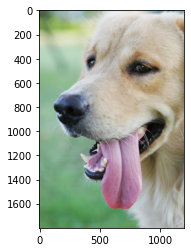

In [22]:
image_file = os.path.join(bing_dir, '000001.jpg')  # 이미지 파일 이름
image = Image.open(image_file) # 이미지 파일
plt.imshow(image)  # 이미지 파일 콘솔 출력

In [24]:
google_crawler = GoogleImageCrawler(storage={'root_dir':download_dir})
google_crawler.crawl(keyword='cat', max_num=10)

2021-02-04 07:37:38,003 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:37:38,005 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:37:38,007 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:37:38,008 - INFO - icrawler.crawler - starting 1 parser threads...
2021-02-04 07:37:38,011 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-02-04 07:37:38,464 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=&tbm=isch
Exception in thread parser-001:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/icrawler/parser.py", line 104, in worker_exec
    for task in self.parse(response, **kwargs):
TypeError: 'NoneType' object is not iterable

2021-02-04 07:37:43,019 - INFO - downloader - 

In [44]:
baidu_crawler = BaiduImageCrawler(storage={'root_dir':baidu_dir},
                                  parser_threads=2,
                                  downloader_threads=4)
baidu_crawler.crawl(keyword='cat', max_num=10, overwrite=True)

2021-02-04 07:51:12,700 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:51:12,702 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:51:12,706 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:51:12,706 - INFO - icrawler.crawler - starting 2 parser threads...
2021-02-04 07:51:12,714 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-02-04 07:51:14,717 - INFO - parser - no more page urls for thread parser-002 to parse
2021-02-04 07:51:14,719 - INFO - parser - thread parser-002 exit
2021-02-04 07:51:15,782 - INFO - parser - parsing result page http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&word=cat&pn=0&rn=30
2021-02-04 07:51:17,114 - INFO - downloader - image #1	https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201207%2F24%2F20120724171731_Cecsx.thumb.700_0.png&refer=http%3A%2F%2Fb-ssl.duitang.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1615017075&t=00db7617459de1c3e

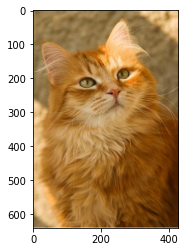

In [45]:
image_file = os.path.join(baidu_dir, '000001.jpg')
image = Image.open(image_file)
plt.imshow(image)

# BeautifulSoup을 이용한 네이버 이미지 검색, 다운로

In [48]:
import requests
import os
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

In [49]:
naver_dir = os.path.join(download_dir, 'naver')  # 파일 저장 디렉토리 경로
if not os.path.join(naver_dir):  # 디렉토리가 없으면
    os.makedirs(naver_dir)       # 디렉토리 생성

In [83]:
url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=dog'
req_params = {'query':'강아지'}
res = requests.get(url, req_params)
print(res)

<Response [200]>


In [106]:
print(html[:100])

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always


In [107]:
html = res.text.strip()
soup = BeautifulSoup(markup=html, features='html5lib')
for i in range(1, 10):
    selector = f'div.photo_group._listGrid > div.photo_tile._grid > div:nth-of-type({i}) > div > div > a > img._image'
    link = soup.select_one(selector)
    print(link)

None
None
None
None
None
None
None
None
None


In [82]:
selector = 'div._contentRoot.image_wrap.type_fixed > div.photo_group._listGrid > div.photo_tile._grid > div:nth-of-type(1) > div > div.thumb > a > img'
print(selector)

div._contentRoot.image_wrap.type_fixed > div.photo_group._listGrid > div.photo_tile._grid > div:nth-of-type(1) > div > div.thumb > a > img


In [110]:
pip install google_images_download

     |████████████████████████████████| 911kB 6.2MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14549 sha256=4cf3c1535bd277af715c49bc6d7fbc664abe90a672805bc3f912679f169dfc3c
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [111]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

arguments = {'keywords':'cat', 'limit':20, 'print_urls':True}
paths = response.download(arguments)
print(arguments)


Item no.: 1 --> Item name = cat
Evaluating...
Starting Download...


Unfortunately all 20 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

{'keywords': 'cat', 'limit': 20, 'print_urls': True, 'keywords_from_file': None, 'prefix_keywords': None, 'suffix_keywords': None, 'format': None, 'color': None, 'color_type': None, 'usage_rights': None, 'size': None, 'exact_size': None, 'aspect_ratio': None, 'type': None, 'time': None, 'time_range': None, 'delay': None, 'url': None, 'single_image': None, 'output_directory': None, 'image_directory': None, 'no_directory': None, 'proxy': None, 'similar_images': None, 'specific_site': None, 'print_size': None, 'print_paths': None, 'metadata': None, 'extract_metadata': None, 'socket_timeout': None, 'thumbnail': None, 'thumbnail_only': None, 'language': None, 'prefix': None, 'chromedriver': None, 'related_images': None, 'safe_search': None, 'no_numbering': None, 'offset': None, 'no_do